In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

# Starting with Classification to Predict Top GPA Performers in a High School.

In [3]:
dfc = pd.read_csv(r"C:\Users\aa1\Desktop\python_projects\Tutorials\Basics-of-MI\Academic Performance of High School Students\High School Students Performance.csv")

In [4]:
dfc.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
dfc = dfc.drop(columns=['StudentID'])

In [6]:
dfc=dfc.drop(columns=['GradeClass'])

In [7]:
dfc['InTopGPA']=[1 if x >= 3 else 0 for x in dfc['GPA']]

In [8]:
dfc.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,InTopGPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0


In [9]:
dfc.corr()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,InTopGPA
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,0.000617
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,-0.007334
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,0.001574
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,-0.004344
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,0.136096
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,-0.540213
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,0.134290
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,0.140736
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,0.073005
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,0.062882


In [10]:
dfccorr = dfc.corr()

<Axes: >

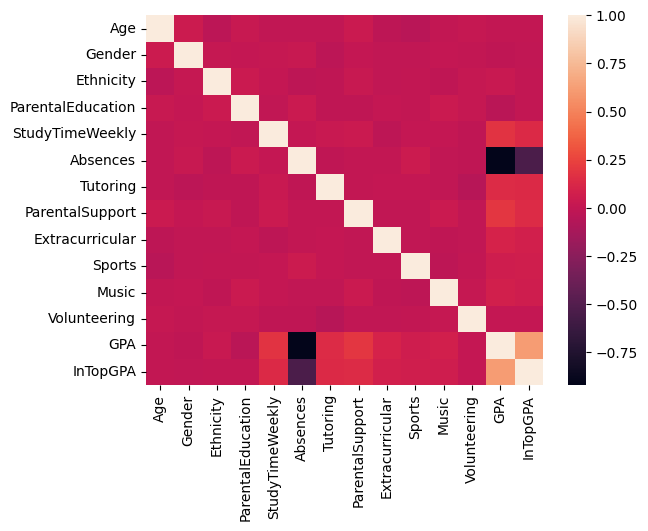

In [11]:
sns.heatmap(dfccorr)

In [12]:
dfc.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'InTopGPA'],
      dtype='object')

In [13]:
dfc = dfc.drop(columns=['GPA',  'Tutoring', 'ParentalSupport', 'Extracurricular'])

In [14]:
X = dfc.drop(columns=['InTopGPA'])
y = dfc['InTopGPA']

In [15]:
X.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,0,1,0
1,18,0,0,1,15.408756,0,0,0,0
2,15,0,2,3,4.210570,26,0,0,0
3,17,1,0,3,10.028829,14,0,0,0
4,17,1,0,2,4.672495,17,0,0,0


In [16]:
X.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Sports', 'Music', 'Volunteering'],
      dtype='object')

In [17]:
new_data = pd.DataFrame([{
    'Age': 19, 
    'Gender': 1, 
    'Ethnicity': 2, 
    'ParentalEducation': 2, 
    'StudyTimeWeekly': 3,
    'Absences': 3, 
    'Sports': 1, 
    'Music': 0, 
    'Volunteering': 0

},
{
    'Age': 19, 
    'Gender': 1, 
    'Ethnicity': 2, 
    'ParentalEducation': 2, 
    'StudyTimeWeekly': 15.408,
    'Absences': 13, 
    'Sports': 0, 
    'Music': 0, 
    'Volunteering': 1

},
{
    'Age': 15, 
    'Gender': 0, 
    'Ethnicity': 1, 
    'ParentalEducation': 0, 
    'StudyTimeWeekly': 8,
    'Absences': 23, 
    'Sports': 1, 
    'Music': 1, 
    'Volunteering': 1

},
{
    'Age': 18, 
    'Gender': 0, 
    'Ethnicity': 3, 
    'ParentalEducation': 2, 
    'StudyTimeWeekly': 3,
    'Absences': 3, 
    'Sports': 1, 
    'Music': 1, 
    'Volunteering': 1

}
])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# K-Nearest Neighbors (KNN) Classification.

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_knn_pred = knn.predict(X_test)

In [21]:
accuracy_score(y_test, y_knn_pred)

0.9123173277661796

In [22]:
knn.score(X_test,y_test)

0.9123173277661796

In [23]:
knn.predict(new_data)

array([1, 0, 0, 1], dtype=int64)

In [24]:
knn_pred_new_data = knn.predict(new_data)

In [25]:
['Top' if x > 0 else 'Other' for x in knn_pred_new_data]

['Top', 'Other', 'Other', 'Top']

# Decision Tree Classification

In [26]:
clf = DecisionTreeClassifier()

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_clf_pred = clf.predict(X_test)

In [29]:
accuracy_score(y_test, y_clf_pred)

0.8956158663883089

In [30]:
clf_pred_new_data = clf.predict(new_data)
['Top' if x > 0 else 'Other' for x in clf_pred_new_data]

['Other', 'Other', 'Other', 'Top']

In [31]:
from sklearn.tree import plot_tree

[Text(0.5228658536585366, 0.9285714285714286, 'Absences <= 4.5\ngini = 0.233\nsamples = 1913\nvalue = [1656, 257]\nclass = GPA Above 3'),
 Text(0.2545731707317073, 0.7857142857142857, 'StudyTimeWeekly <= 9.072\ngini = 0.454\nsamples = 298\nvalue = [104.0, 194.0]\nclass = GPA Less than 3'),
 Text(0.3887195121951219, 0.8571428571428572, 'True  '),
 Text(0.10670731707317073, 0.6428571428571429, 'Absences <= 0.5\ngini = 0.5\nsamples = 138\nvalue = [70, 68]\nclass = GPA Above 3'),
 Text(0.036585365853658534, 0.5, 'StudyTimeWeekly <= 1.16\ngini = 0.26\nsamples = 26\nvalue = [4, 22]\nclass = GPA Less than 3'),
 Text(0.024390243902439025, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = GPA Above 3'),
 Text(0.04878048780487805, 0.35714285714285715, 'Age <= 17.5\ngini = 0.211\nsamples = 25\nvalue = [3, 22]\nclass = GPA Less than 3'),
 Text(0.024390243902439025, 0.21428571428571427, 'StudyTimeWeekly <= 5.291\ngini = 0.105\nsamples = 18\nvalue = [1, 17]\nclass = GPA Less tha

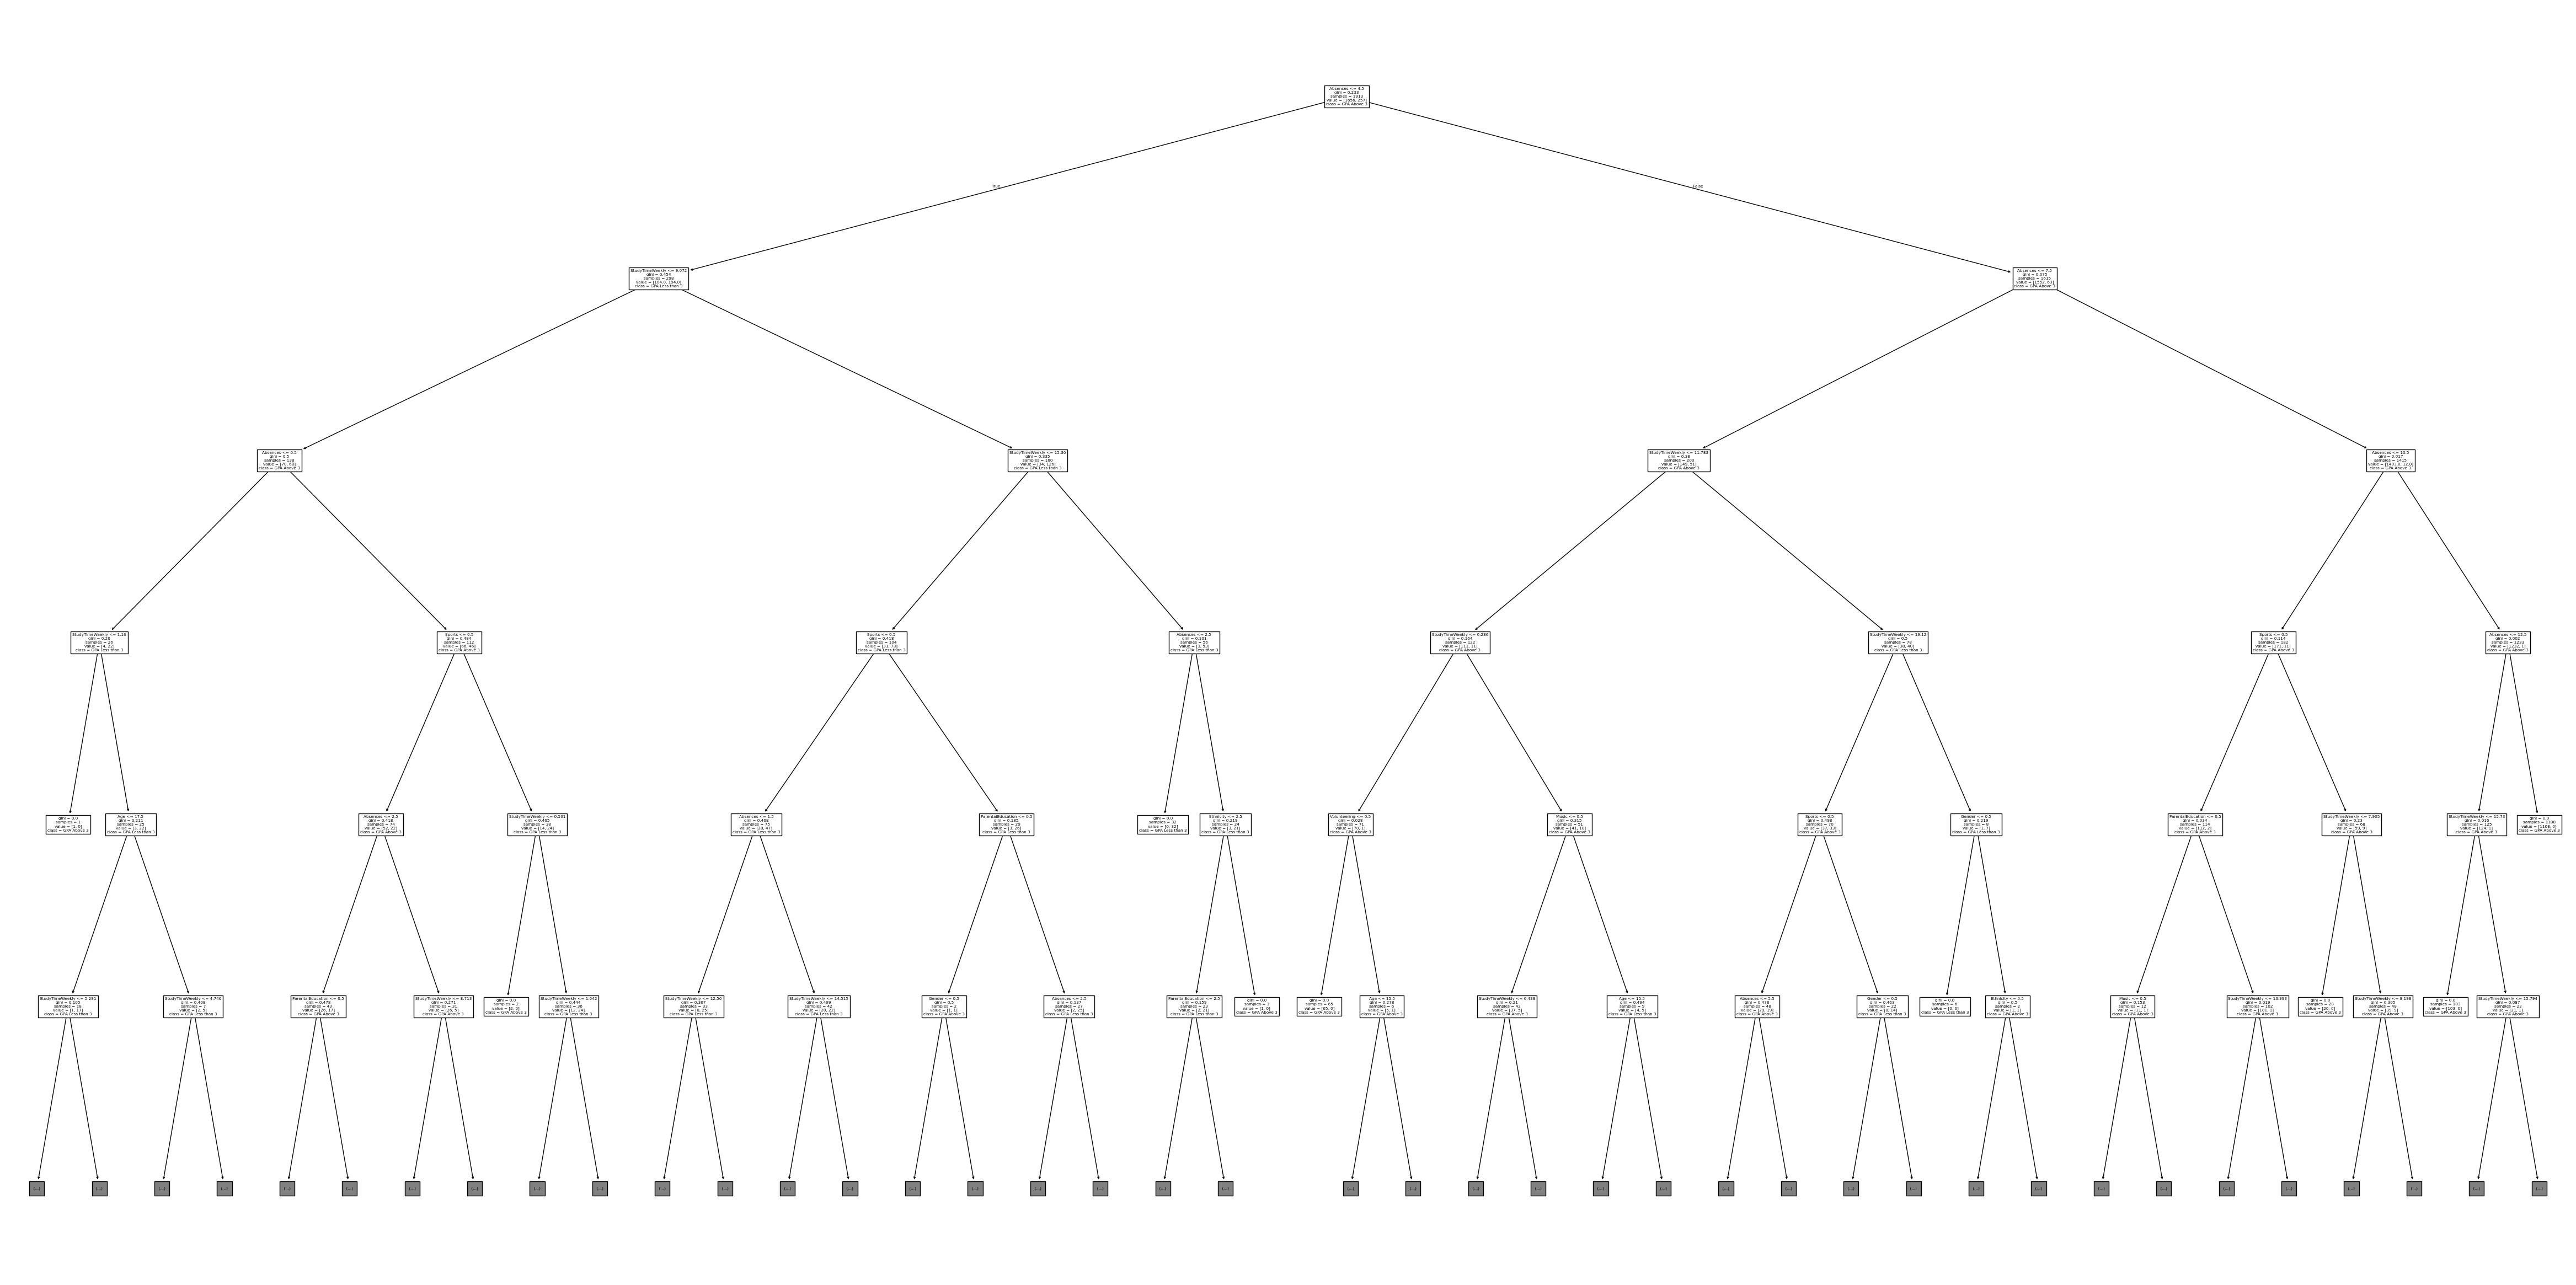

In [32]:
plt.figure(figsize=(60,30))
plot_tree(clf, max_depth=5, feature_names=list(X.columns),
class_names = ['GPA Above 3', 'GPA Less than 3'])

# Random Forest Classification

In [33]:
forest = RandomForestClassifier()

In [34]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_forest_pred = forest.predict(X_test)

In [36]:
accuracy_score(y_test, y_forest_pred)

0.9144050104384134

In [37]:
forest_pred_new_data = forest.predict(new_data)
['Top' if x > 0 else 'Other' for x in forest_pred_new_data]

['Top', 'Other', 'Other', 'Top']

# Histogram-Based Gradient Boosting Classification

In [38]:
hist = HistGradientBoostingClassifier()

In [39]:
hist.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [40]:
y_hist_pred = hist.predict(X_test)

In [41]:
accuracy_score(y_test, y_hist_pred)

0.9123173277661796

# Now to Regression to Predict GPA Scores in the same High School.

In [42]:
dfr = pd.read_csv(r"C:\Users\aa1\Desktop\python_projects\Tutorials\Basics-of-MI\Academic Performance of High School Students\High School Students Performance.csv")

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

In [44]:
dfr.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [45]:
dfr=dfr.drop(columns=['GradeClass', 'StudentID'])

In [46]:
dfrcorr = dfr.corr()

<Axes: >

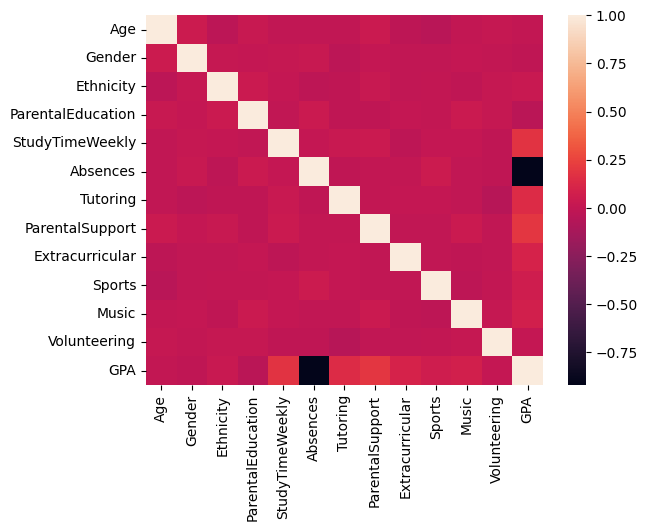

In [47]:
sns.heatmap(dfrcorr)

In [48]:
X1 = dfr.drop(columns=['GPA'])
y1 = dfr['GPA']

In [49]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [50]:
knnr = KNeighborsRegressor(n_neighbors=3)
knnr.fit(X1_train, y1_train)

KNeighborsRegressor(n_neighbors=3)

In [51]:
y_knnr_pred = knnr.predict(X1_test)

In [52]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [53]:
(root_mean_squared_error(y1_test, y_knnr_pred))

0.2929353053596065

In [54]:
print('R2_score % is' , r2_score(y1_test, y_knnr_pred)*100)

R2_score % is 89.33112289065383


In [55]:
X1.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')

In [64]:
new_data_4r = pd.DataFrame([{
    'Age': 15, 
    'Gender': 0, 
    'Ethnicity': 2, 
    'ParentalEducation': 1, 
    'StudyTimeWeekly': 5.8, 
    'Absences': 19, 
    'Tutoring': 1, 
    'ParentalSupport': 2, 
    'Extracurricular': 1, 
    'Sports': 0, 
    'Music': 1, 
    'Volunteering': 0
},
{
    'Age': 17, 
    'Gender': 0, 
    'Ethnicity': 1, 
    'ParentalEducation': 0, 
    'StudyTimeWeekly': 15.8, 
    'Absences': 1, 
    'Tutoring': 0, 
    'ParentalSupport': 4, 
    'Extracurricular': 0, 
    'Sports': 0, 
    'Music': 0, 
    'Volunteering': 0
},
{
    'Age': 15, 
    'Gender': 0, 
    'Ethnicity': 2, 
    'ParentalEducation': 1, 
    'StudyTimeWeekly': 5.8, 
    'Absences': 19, 
    'Tutoring': 1, 
    'ParentalSupport': 3, 
    'Extracurricular': 1, 
    'Sports': 1, 
    'Music': 1, 
    'Volunteering': 1
}

])

In [65]:
knnr.predict(new_data_4r)

array([1.16631004, 3.26882315, 1.41827099])

In [58]:
rforest = RandomForestRegressor()
rforest.fit(X1_train, y1_train)

RandomForestRegressor()

In [59]:
y_rforest_pred = rforest.predict(X1_test)

In [60]:
root_mean_squared_error(y1_test, y_rforest_pred)

0.23826490333404923

In [61]:
r2_score(y1_test, y_rforest_pred)

0.9294177614054414

In [66]:
rforest.predict(new_data_4r)

array([1.44450859, 3.38655766, 1.59915312])

In [67]:
rhist = HistGradientBoostingRegressor()
rhist.fit(X1_train, y1_train)

HistGradientBoostingRegressor()

In [68]:
y_rhist_pred = rhist.predict(X1_test)

In [69]:
root_mean_squared_error(y1_test, y_rhist_pred)

0.2154536051954984

In [70]:
r2_score(y1_test, y_rhist_pred)

0.9422857828145467

In [71]:
rhist.predict(new_data_4r)

array([1.66250365, 3.38974785, 1.86509937])